In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/priject1/lab8/diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f452b46a2d0>,
      dtype=object)

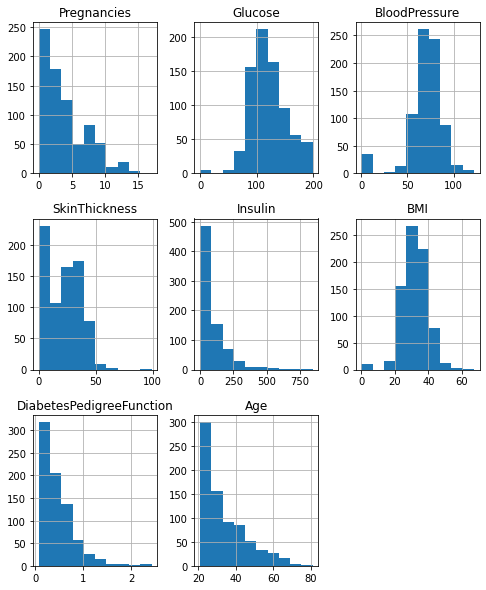

In [6]:
X.hist(figsize = (8,10))

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [8]:
X = pd.DataFrame(X_std, columns = X.columns)

In [9]:
from sklearn.decomposition import PCA
pca = PCA()
pca = pca.fit(X)
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [10]:
print("Eigen vectors:", pca.components_)

Eigen vectors: [[ 0.1284321   0.39308257  0.36000261  0.43982428  0.43502617  0.45194134
   0.27061144  0.19802707]
 [ 0.59378583  0.17402908  0.18389207 -0.33196534 -0.25078106 -0.1009598
  -0.122069    0.62058853]
 [-0.01308692  0.46792282 -0.53549442 -0.2376738   0.33670893 -0.36186463
   0.43318905  0.07524755]
 [ 0.08069115 -0.40432871  0.05598649  0.03797608 -0.34994376  0.05364595
   0.8336801   0.0712006 ]
 [-0.47560573  0.46632804  0.32795306 -0.48786206 -0.34693481  0.25320376
   0.11981049 -0.10928996]
 [ 0.19359817  0.09416176 -0.6341159   0.00958944 -0.27065061  0.68537218
  -0.08578409 -0.03335717]
 [-0.58879003 -0.06015291 -0.19211793  0.28221253 -0.13200992 -0.03536644
  -0.08609107  0.71208542]
 [ 0.11784098  0.45035526 -0.01129554  0.5662838  -0.54862138 -0.34151764
  -0.00825873 -0.21166198]]


In [11]:
new_list = set(pca.components_[0])
new_list.remove(max(new_list))
print("The feature having high significance are:")
for i in range(len(pca.components_[0])):
  if pca.components_[0][i] == max(pca.components_[0]):
    print(X.columns[i])
for i in range(len(pca.components_[0])):
  if pca.components_[0][i] == max(new_list):
    print(X.columns[i])

The feature having high significance are:
BMI
SkinThickness


In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X, y)
X_lda = lda.transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(8, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [14]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

print("Accuracy and F1 score for classifier trained on complete dataset:")
y_pred = clf.predict(X_test)
print("Accuracy", clf.score(X_test, y_test))
from sklearn.metrics import f1_score
print("F1 score",f1_score(y_test, y_pred))

Accuracy and F1 score for classifier trained on complete dataset:
Accuracy 0.7662337662337663
F1 score 0.5499999999999999


In [15]:
X_train1 = pd.DataFrame(data = X_train["BMI"])
X_train1["SkinThickness"] = X_train["SkinThickness"]

X_test1 = pd.DataFrame(data = X_test["BMI"])
X_test1["SkinThickness"] = X_test["SkinThickness"]

In [16]:
clf2 = LogisticRegression(random_state=0).fit(X_train1, y_train)
y_pred2 = clf2.predict(X_test1)
print("Accuracy and F1 score for classifier trained on selected features dataset:")
print("Accuracy", clf2.score(X_test1, y_test))
from sklearn.metrics import f1_score
print("F1 score",f1_score(y_test, y_pred2))

Accuracy and F1 score for classifier trained on selected features dataset:
Accuracy 0.6948051948051948
F1 score 0.3561643835616438


In [17]:
df.corr(method = "pearson")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [18]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
fts = [column for column in upper.columns if any(upper[column] > 0.7)]

In [19]:
fts

[]